# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

random_state=42

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Нам нужно при повторном запуске кода получать один и тот же результат. Например, когда при генерации псевдослучайных чисел нужно получать одну и ту же последовательность при повторном запуске программы. Еще пример: при разбиении на обучающую и тестовую выборки мы фиксируем random_state.")

Нам нужно при повторном запуске кода получать один и тот же результат. Например, когда при генерации псевдослучайных чисел нужно получать одну и ту же последовательность при повторном запуске программы. Еще пример: при разбиении на обучающую и тестовую выборки мы фиксируем random_state.


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [4]:
# your code here
df_train.sample(10, random_state=random_state)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [5]:
# your code here
pd.concat([df_test.head(), df_test.tail()])

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [6]:
# your code here
df_train.describe()

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [7]:
df_train.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


In [8]:
df_test.describe()

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


In [9]:
df_test.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [10]:
# your code here
print('В датасете пропуски в колонках "seats", "mileage", "engine", "max_power", "torque"')

В датасете пропуски в колонках "seats", "mileage", "engine", "max_power", "torque"


(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [11]:
# your code here
duplicated_mask = df_train.duplicated(subset=df_train.columns.drop('selling_price'))
df_duplicated_only = df_train[duplicated_mask]
print(f'В трейне {df_duplicated_only.shape[0]} объектов с одинаковым признаковым описанием')

В трейне 1159 объектов с одинаковым признаковым описанием


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [12]:
# your code here
pd.set_option('display.max_rows', None)
df_duplicated_only

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
326,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
338,Skoda Rapid 1.6 MPI AT Elegance,2016,645000,11000,Petrol,Dealer,Automatic,First Owner,14.3 kmpl,1598 CC,103.5 bhp,153Nm@ 3800rpm,5.0
357,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
358,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
359,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0


In [13]:
pd.reset_option('display.max_rows')

(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [14]:
# your code here
df_train.drop_duplicates(subset=df_train.columns.drop('selling_price'), keep='first', inplace=True)

In [15]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [16]:
# your code here
df_train.reset_index(drop=True, inplace=True)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [17]:
# your code here
import re

# убрать единицы измерения для признаков mileage, engine, max_power
def get_float(x):
    if pd.notna(x):
        arr = re.findall(r'\d+',x)
        if len(arr) == 0:
            return None
        else:
            return float('.'.join(arr))

for col in ['mileage', 'engine', 'max_power']:
    df_train[col] = df_train[col].apply(get_float)
for col in ['mileage', 'engine', 'max_power']:
    df_test[col] = df_test[col].apply(get_float)
    
# Разделить torque на max_torque_rpm и torque_nm
def get_max_torque_rpm(string):
    if pd.notna(string):
        arr = re.findall(r'\s.+',string)
        if len(arr) > 0:
            if '~' in arr[0]:
                digits = re.findall(r'\d+', arr[0].strip().split('~')[-1])
            else:
                digits = re.findall(r'\d+', arr[0].strip().split('-')[-1])
            return float(''.join(digits))
        
df_train['max_torque_rpm'] = df_train['torque'].apply(get_max_torque_rpm)
df_test['max_torque_rpm'] = df_test['torque'].apply(get_max_torque_rpm)


def get_torque(string):
    if pd.isna(string):
        return
    string = string.lower()
    arr = re.findall(r'\d+\.?\d*[\s@nk(]', string)
    torque = '.'.join(re.findall(r'\d+', arr[0]))
    if 'nm' in string:
        return float(torque)
    elif 'kgm' in string:
        return float(torque) * 9.80665
    else:
        return float(torque)

df_train['torque_nm'] = df_train['torque'].apply(get_torque)
df_test['torque_nm'] = df_test['torque'].apply(get_torque)

df_train = df_train.drop(columns=['torque'])
df_test = df_test.drop(columns=['torque'])

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [18]:
# your code here
from sklearn import impute

cat_features_mask = (df_train.dtypes == "object").values
df_train_real = df_train[df_train.columns[~cat_features_mask]]
df_test_real = df_test[df_train.columns[~cat_features_mask]]

mis_replacer = impute.SimpleImputer(strategy='median')
mis_replacer.fit(df_train_real)
df_train_real = pd.DataFrame(data=mis_replacer.transform(df_train_real), columns=df_train_real.columns)
df_test_real = pd.DataFrame(data=mis_replacer.transform(df_test_real), columns=df_test_real.columns)

df_train_cat = df_train[df_train.columns[cat_features_mask]]
df_test_cat = df_test[df_test.columns[cat_features_mask]]

df_train = pd.concat([df_train_real, df_train_cat], axis=1)
df_test = pd.concat([df_test_real, df_test_cat], axis=1)

print(df_train.isna().sum().sum())
print(df_test.isna().sum().sum())

0
0



(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [19]:
print(f"seats лучше рассматривать как категориальный признак,\n"
      + f"потому что seats может принимать одно из {len(df_train['seats'].unique())} уникальных значений: {df_train['seats'].unique()}.\n"
      + "Признак следует рассматривать как числовой, когда он может быть равен либому числу из множества натуральных чисел (или целых чисел или действительных чисел и т.д.).\n"
      + "Например, пробег автомобиля в км может быть равен положительному целому числу от 0 до бесконечности, или\n"
      + "скорость может быть равна положительному действительному числу от 0 до бесконечности")

seats лучше рассматривать как категориальный признак,
потому что seats может принимать одно из 9 уникальных значений: [ 5.  4.  7.  8.  6.  9. 10. 14.  2.].
Признак следует рассматривать как числовой, когда он может быть равен либому числу из множества натуральных чисел (или целых чисел или действительных чисел и т.д.).
Например, пробег автомобиля в км может быть равен положительному целому числу от 0 до бесконечности, или
скорость может быть равна положительному действительному числу от 0 до бесконечности


In [20]:
# your code here
df_train['engine'] = df_train['engine'].astype('int64')
df_train['seats'] = df_train['seats'].astype('int64')

df_test['engine'] = df_test['engine'].astype('int64')
df_test['seats'] = df_test['seats'].astype('int64')

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

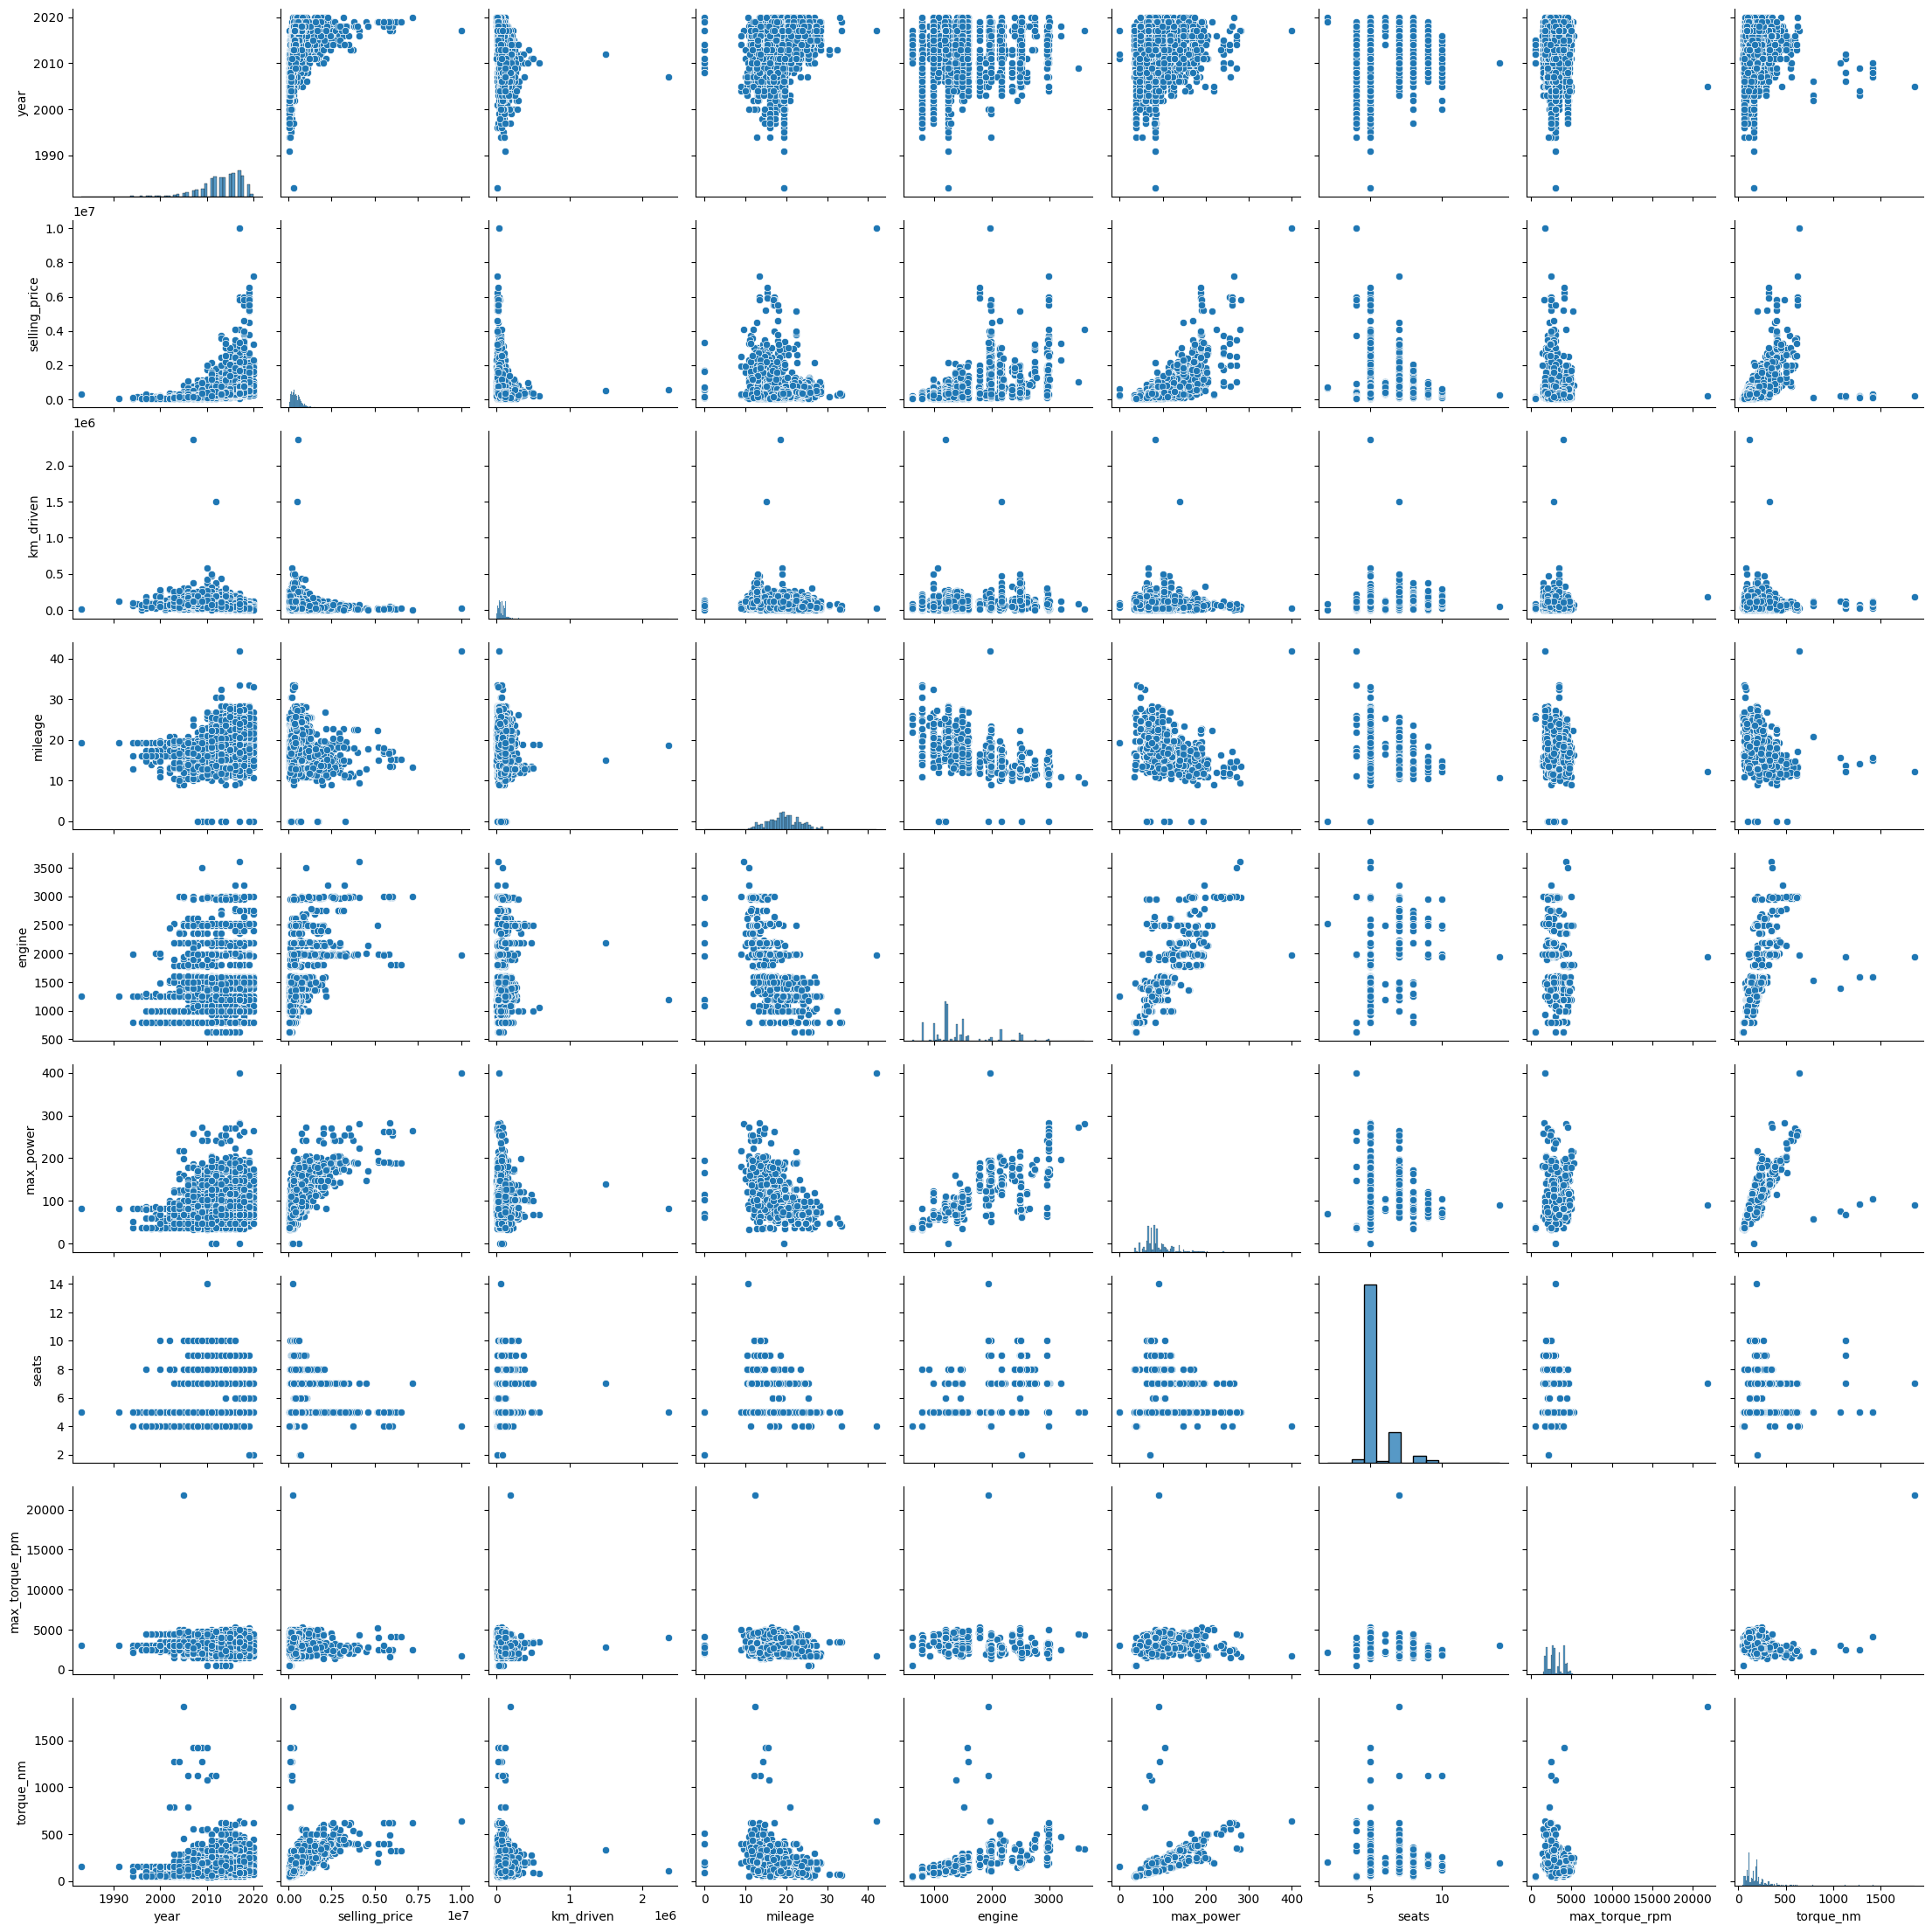

In [21]:
# your code here
sns.pairplot(df_train);

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

In [22]:
print('Чем больше year, тем больше selling_price.')
print('Чем больше km_driven, тем меньше selling_price.')
print('С увеличением mileage selling_price сначала растет, а затем уменьшается.\n'
      + '    Самая большая цена у авто со средним значением mileage. Наблюдается один выброс - очень дорогое авто с очень большим mileage.')
print('Чем больше engine, тем больше selling_price.')
print('Чем больше max_power, тем больше selling_price.')
print('Самая большая цена у авто со значением seats 4 и 5. Далее в среднем чем больше seats, тем меньше selling_price')
print('При увеличении torque в среднем selling_price растет.\n'
      + '    Но есть несколько объектов, у которых при большом torque наблюдается низкое значение selling_price.\n'
      + 'По графику нельзя сказать, что max_torque_rpm оказывает какое-либо заметное влияние на selling_price.\n'
      + '    В датасете есть один объект, у которого max_torque_rpm составляет более 20000, что в разы больше, чем у остальных\n'
      + '    объектов выборки. Может повлиять на результат обучения модели.')

print()
print('Корреляция признаков')
print('Средние значения max_power, engine и mileage возрастают при увеличении year. Среднее значение torque также возрастает\n'
      + '    при увеличении year, если не считать сильных выбросов в интервале year с 2000 по 2010 (несколько объектов с очень большим torque).')
print('Между engine и torque наблюдается положительная зависимость, если не считать нескольких объектов с очень большим torque при engine 1500-2000.')
print('Между engine и max_power наблюдается положительная зависимость.')
print('Между engine и mileage наблюдается обратная зависимость, т.е. при увеличении engine среднее значение mileage падает.')
print('В среднем mileage также падает при увеличении max_power, seats и torque.')
print('Между max_power и torque наблюдается положительная зависимость. Есть несколько выбросов: объекты с большим значением torque при небольшом max_power.')


Чем больше year, тем больше selling_price.
Чем больше km_driven, тем меньше selling_price.
С увеличением mileage selling_price сначала растет, а затем уменьшается.
    Самая большая цена у авто со средним значением mileage. Наблюдается один выброс - очень дорогое авто с очень большим mileage.
Чем больше engine, тем больше selling_price.
Чем больше max_power, тем больше selling_price.
Самая большая цена у авто со значением seats 4 и 5. Далее в среднем чем больше seats, тем меньше selling_price
При увеличении torque в среднем selling_price растет.
    Но есть несколько объектов, у которых при большом torque наблюдается низкое значение selling_price.
По графику нельзя сказать, что max_torque_rpm оказывает какое-либо заметное влияние на selling_price.
    В датасете есть один объект, у которого max_torque_rpm составляет более 20000, что в разы больше, чем у остальных
    объектов выборки. Может повлиять на результат обучения модели.

Корреляция признаков
Средние значения max_power, engine 

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

In [23]:
print('Да, графики, построенные на обучающей и тестовой выборках, похожи ')

Да, графики, построенные на обучающей и тестовой выборках, похожи 


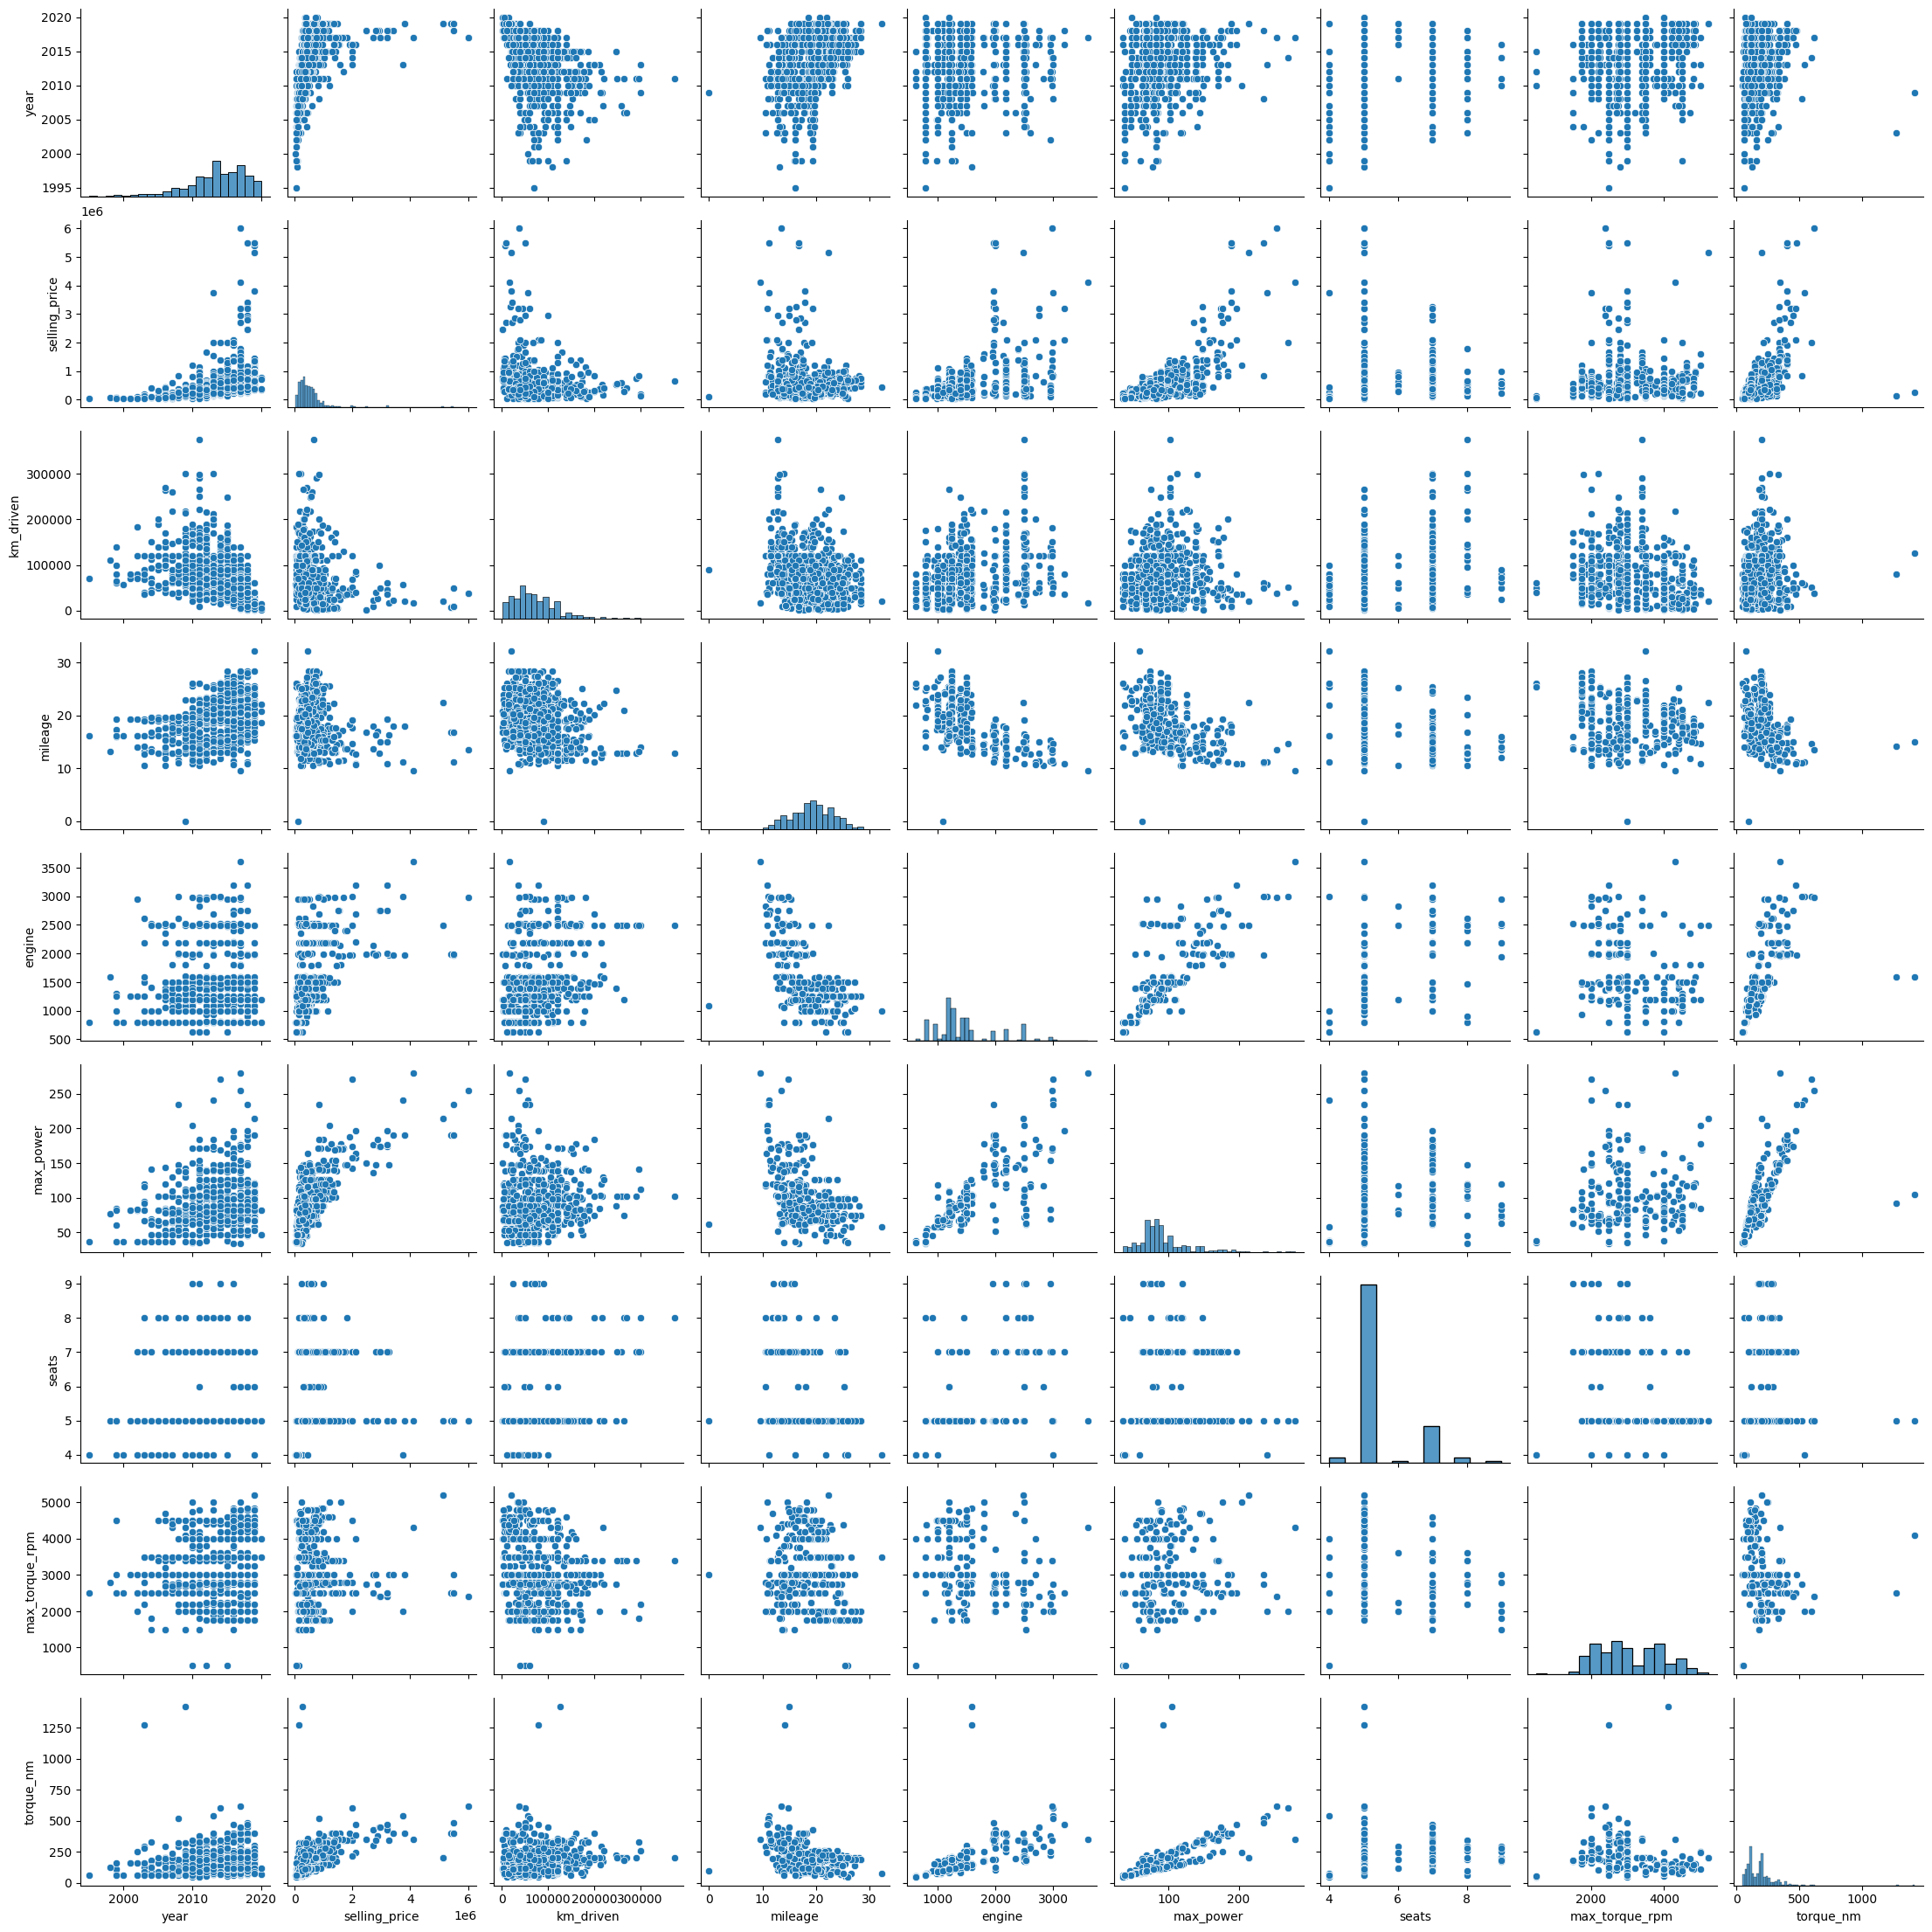

In [24]:
# your code here
sns.pairplot(df_test);

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

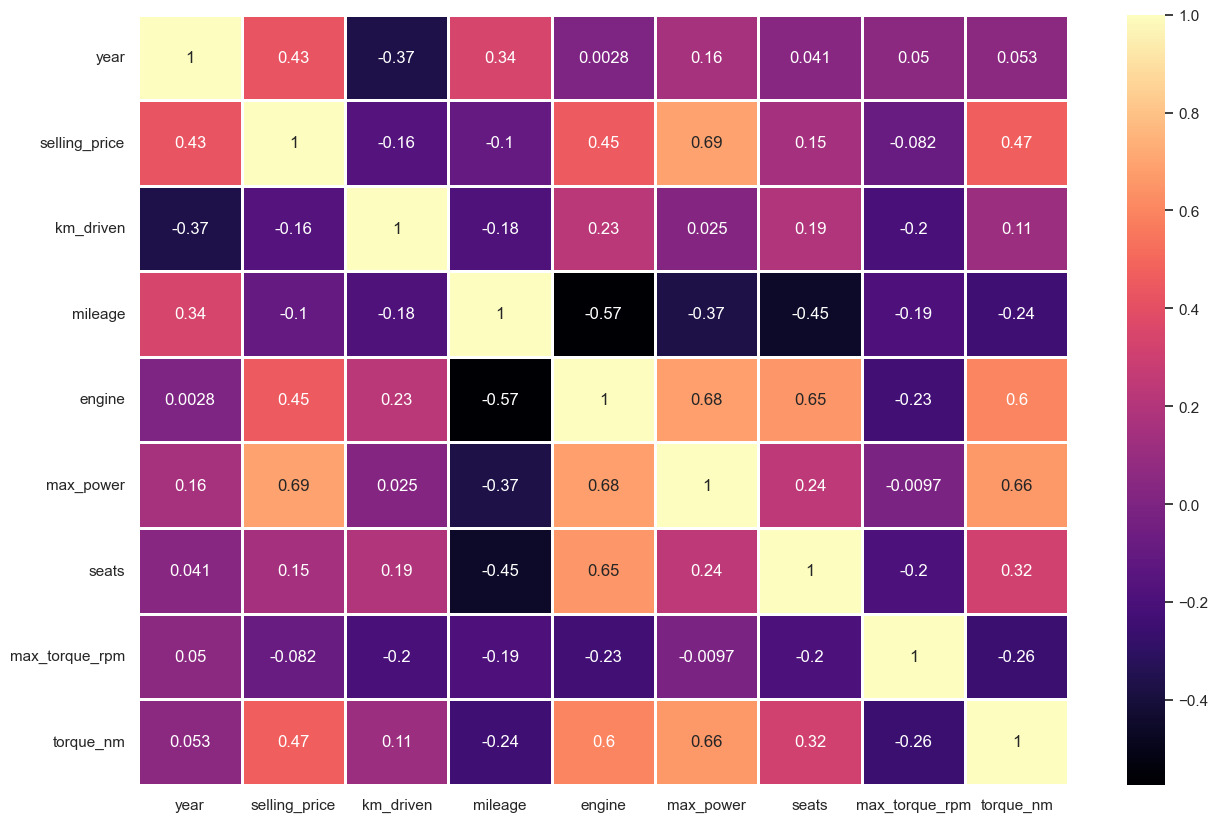

In [25]:
# your code here
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df_train.corr(numeric_only = True), annot = True, linecolor = 'white', linewidths = 1, cmap = 'magma');

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

In [26]:
print('- Наименее скоррелированы между собой year и engine')
print('- Довольно сильная положительная линейная зависимость наблюдается между\n'
     + '    selling_price и max_power, engine и max_power, engine и seats, engine и torque_nm, max_power и torque_nm.')
print('- Между year и km_driven наблюдается обратная зависимость, но рассчитанное значение корреляции оказалось не таким большим\n'
     + '    как ожидалось: -0,37. Тенденция, что чем новее машина, тем меньше км она проехала, наблюдается более отчетливо\n'
     + '    начиная с 2010 года.\n'
     + '    До 2010 года в выборке много объектов, у которых при маленьком значении year признак km_driven имеет также небольшое значение.')


- Наименее скоррелированы между собой year и engine
- Довольно сильная положительная линейная зависимость наблюдается между
    selling_price и max_power, engine и max_power, engine и seats, engine и torque_nm, max_power и torque_nm.
- Между year и km_driven наблюдается обратная зависимость, но рассчитанное значение корреляции оказалось не таким большим
    как ожидалось: -0,37. Тенденция, что чем новее машина, тем меньше км она проехала, наблюдается более отчетливо
    начиная с 2010 года.
    До 2010 года в выборке много объектов, у которых при маленьком значении year признак km_driven имеет также небольшое значение.


(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

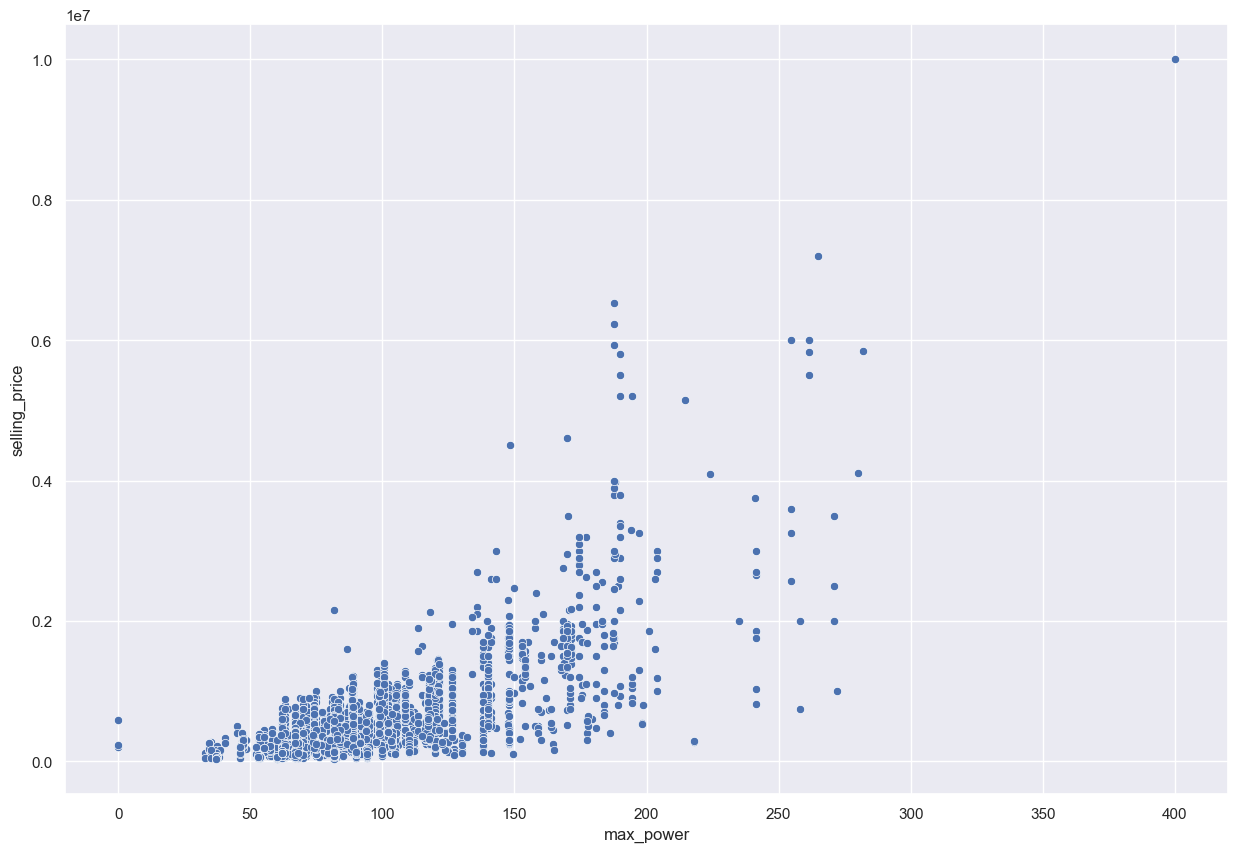

In [27]:
# your code here
sns.scatterplot(data=df_train, x='max_power', y='selling_price');

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [28]:
# your code here

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [29]:
y_train = df_train['selling_price']
X_train = df_train[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'max_torque_rpm', 'torque_nm']]

In [30]:
assert X_train.shape == (5840, 8)

In [31]:
y_test = df_test['selling_price']
X_test = df_test[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'max_torque_rpm', 'torque_nm']]

In [32]:
assert X_test.shape == (1000, 8)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here
lr = LinearRegression()
lr.fit(X_train, y_train)
train_predict = lr.predict(X_train)
print(f'Train data: R2 = {r2_score(y_train, train_predict)}; MSE = {MSE(y_train, train_predict)}')
test_predict = lr.predict(X_test)
print(f'Test data: R2 = {r2_score(y_test, test_predict)}; MSE = {MSE(y_test, test_predict)}')

Train data: R2 = 0.6012663142661763; MSE = 114292361126.05899
Test data: R2 = 0.6006926598587444; MSE = 229533261589.22696


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [34]:
from sklearn.preprocessing import StandardScaler

# your code here
scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = pd.DataFrame(data=scaler.transform(X_train))
X_test_norm = pd.DataFrame(data=scaler.transform(X_test))

lr = LinearRegression()
lr.fit(X_train_norm, y_train)
train_predict = lr.predict(X_train_norm)
print(f'Train data: R2 = {r2_score(y_train, train_predict)}; MSE = {MSE(y_train, train_predict)}')
test_predict = lr.predict(X_test_norm)
print(f'Test data: R2 = {r2_score(y_test, test_predict)}; MSE = {MSE(y_test, test_predict)}')

Train data: R2 = 0.6012663142661766; MSE = 114292361126.05888
Test data: R2 = 0.6006926598587421; MSE = 229533261589.2283


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [35]:
# your code here
index = abs(lr.coef_).argmax()
print(f'Наиболее информативный признак в предсказании цены это {X_train.columns[index]}')
lr.coef_

Наиболее информативный признак в предсказании цены это max_power


array([165839.11983466, -48773.46224176,  -8849.91602519,  22175.59719406,
       329249.50345157, -30085.27585801, -59184.18063823,   7908.40133187])

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [36]:
from sklearn.linear_model import Lasso

# your code here
lasso_lr = Lasso(random_state = random_state)
lasso_lr.fit(X_train_norm, y_train)
train_predict = lasso_lr.predict(X_train_norm)
print(f'Train data: R2 = {r2_score(y_train, train_predict)}; MSE = {MSE(y_train, train_predict)}')
test_predict = lasso_lr.predict(X_test_norm)
print(f'Test data: R2 = {r2_score(y_test, test_predict)}; MSE = {MSE(y_test, test_predict)}')

Train data: R2 = 0.6012663142251409; MSE = 114292361137.8213
Test data: R2 = 0.6006914069487093; MSE = 229533981797.6928


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [37]:
# your code here
print(lasso_lr.coef_)
print()
print('''Не занулила. По умолчанию коэффициент регуляризации alfa=1. Возможно, для нашего случая alfa имеет
слишком маленькое значение, из-за чего регуляризация делает незначилеьный вклад в
расчет весов на каждом шаге градиентного спуска и практически не влияет на результат.''')

[165837.15454908 -48772.55162706  -8846.77621888  22174.23600719
 329250.46748    -30081.71238566 -59182.07044855   7907.74939839]

Не занулила. По умолчанию коэффициент регуляризации alfa=1. Возможно, для нашего случая alfa имеет
слишком маленькое значение, из-за чего регуляризация делает незначилеьный вклад в
расчет весов на каждом шаге градиентного спуска и практически не влияет на результат.


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [38]:
from sklearn.model_selection import GridSearchCV

# your code here
params = {'alpha' : np.arange(20000.0001, 23000.0001, 10.0),
         'random_state' : [random_state]}

gs = GridSearchCV(Lasso(), params, cv=10)

gs.fit(X_train_norm, y_train)

gs.best_score_, gs.best_estimator_

(0.5834253799912055, Lasso(alpha=21530.0001, random_state=42))

In [39]:
train_predict = gs.best_estimator_.predict(X_train_norm)
print(f'Train data: R2 = {r2_score(y_train, train_predict)}; MSE = {MSE(y_train, train_predict)}')
test_predict = gs.best_estimator_.predict(X_test_norm)
print(f'Test data: R2 = {r2_score(y_test, test_predict)}; MSE = {MSE(y_test, test_predict)}')

Train data: R2 = 0.5936586911602078; MSE = 116472997572.00687
Test data: R2 = 0.5744322470599343; MSE = 244628496748.8363


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [40]:
# your code here
print('Грид-сёрч на каждой итерации (для каждого значения alpha) обучает 10 моделей, т.к. задано 10 фолдов')
print()

best_alpha = gs.best_params_['alpha']
print(f'У лучшей из перебранных моделей коэффициент регуляризации равен {best_alpha:.1f}')
print()

zero_coef = []
coef = gs.best_estimator_.coef_
names = X_train.columns
for i in range(len(coef)):
    if(coef[i] == 0):
        zero_coef.append(names[i])
print(f'Занулились веса у признаков {zero_coef}')

coef_df = pd.DataFrame({'feature': names, 'coef': coef})
coef_df

Грид-сёрч на каждой итерации (для каждого значения alpha) обучает 10 моделей, т.к. задано 10 фолдов

У лучшей из перебранных моделей коэффициент регуляризации равен 21530.0

Занулились веса у признаков ['mileage', 'engine', 'seats', 'torque_nm']


,feature,coef
0,year,147776.166758
1,km_driven,-26606.767212
2,mileage,0.000000
3,engine,0.000000
4,max_power,326555.937274
5,seats,-0.000000
6,max_torque_rpm,-32005.736552
7,torque_nm,0.000000


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [41]:
from sklearn.linear_model import ElasticNet

# your code here
params = {'alpha' : np.arange(0.0001, 10.0001, 0.1),
         'l1_ratio': np.arange(0.0001, 1.0001, 0.01),
         'random_state' : [random_state]}

gs = GridSearchCV(ElasticNet(), params, cv=10)

gs.fit(X_train_norm, y_train)

gs.best_score_, gs.best_estimator_

(0.5813209113089333,
 ElasticNet(alpha=5.6001, l1_ratio=0.9801, random_state=42))

In [42]:
train_predict = gs.best_estimator_.predict(X_train_norm)
print(f'Train data: R2 = {r2_score(y_train, train_predict)}; MSE = {MSE(y_train, train_predict)}')
test_predict = gs.best_estimator_.predict(X_test_norm)
print(f'Test data: R2 = {r2_score(y_test, test_predict)}; MSE = {MSE(y_test, test_predict)}')

Train data: R2 = 0.594724144255485; MSE = 116167597867.1783
Test data: R2 = 0.5751608443435281; MSE = 244209678224.66605


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [43]:
# your code here
print('Гиперпараметры, соответствующие лучшей из перебранных моделей')
print(gs.best_params_)

Гиперпараметры, соответствующие лучшей из перебранных моделей
{'alpha': 5.6001, 'l1_ratio': 0.9801, 'random_state': 42}


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [44]:
# your code here
X_train_cat = df_train.drop(columns=['name', 'selling_price'])
X_test_cat = df_test.drop(columns=['name', 'selling_price'])
y_train = df_train['selling_price']
y_test = df_test['selling_price']

In [45]:
assert X_train_cat.shape == (5840, 12)

In [46]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [47]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# your code here
X_train_dum = pd.get_dummies(X_train_cat, drop_first=True, columns=['fuel', 'seller_type', 'transmission', 'owner', 'seats'])
X_test_dum = pd.get_dummies(X_test_cat, drop_first=False, columns=['fuel', 'seller_type', 'transmission', 'owner', 'seats'])

for col in X_test_dum.columns:
    if col not in X_train_dum.columns:
        X_test_dum.drop(columns=[col], inplace=True)

for i in range(len(X_train_dum.columns)):
    col = X_train_dum.columns[i]
    if col not in X_test_dum:
        X_test_dum.insert(i, col, 0)

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [48]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here
scaled_columns = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'max_torque_rpm', 'torque_nm']
X_train_norm = X_train_dum.copy()
X_test_norm = X_test_dum.copy()
scaler = StandardScaler()
scaler.fit(X_train_norm[scaled_columns])

X_train_norm[scaled_columns] = scaler.transform(X_train_norm[scaled_columns])
X_test_norm[scaled_columns] = scaler.transform(X_test_norm[scaled_columns])

params = {'alpha' : np.arange(0, 500, 1.0),
         'random_state' : [random_state]}

gs = GridSearchCV(Ridge(), params, scoring='r2', cv=10)

gs.fit(X_train_norm, y_train)

gs.best_score_, gs.best_estimator_

(0.6260917297742951, Ridge(alpha=8.0, random_state=42))

In [49]:
train_predict = gs.best_estimator_.predict(X_train_norm)
print(f'Train data: R2 = {r2_score(y_train, train_predict)}; MSE = {MSE(y_train, train_predict)}')
test_predict = gs.best_estimator_.predict(X_test_norm)
print(f'Test data: R2 = {r2_score(y_test, test_predict)}; MSE = {MSE(y_test, test_predict)}')

Train data: R2 = 0.6606281083728271; MSE = 97276995101.38559
Test data: R2 = 0.6505186605607485; MSE = 200891853572.4539


In [74]:
import pickle

coef = {'independent_term': gs.best_estimator_.intercept_, 'coef': list(gs.best_estimator_.coef_)}
best_model = {'coef': coef, 'name': 'Ridge', 'best_params': gs.best_params_,
              'R2_test_data': r2_score(y_test, test_predict), 'MSE_test_data': MSE(y_test, test_predict),
             'column_names': list(X_train_norm.columns)}

with open('best_model.pickle', 'wb') as f:
    pickle.dump(best_model, f)

# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [52]:
# your code here

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [53]:
def business_metrics(y_true, y_pred):
    # your code here
    bm_df = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
    bm_df['diff'] = abs(bm_df['y_true'] - bm_df['y_pred'])/bm_df['y_true']
    return bm_df[bm_df['diff'] <= 0.1]['diff'].count() / bm_df.shape[0]
    

business_metrics(y_test, test_predict)

0.244

# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [54]:
# from fastapi import FastAPI
# from pydantic import BaseModel
# from typing import List

# app = FastAPI()


# class Item(BaseModel):
#     name: str
#     year: int
#     selling_price: int
#     km_driven: int
#     fuel: str
#     seller_type: str
#     transmission: str
#     owner: str
#     mileage: str 
#     engine: str
#     max_power: str
#     torque: str
#     seats: float


# class Items(BaseModel):
#     objects: List[Item]


# @app.post("/predict_item")
# def predict_item(item: Item) -> float:
#     return ...


# @app.post("/predict_items")
# def predict_items(items: List[Item]) -> List[float]:
#     return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

## Тестирование сервиса

Реализовано три функции
- Предсказание стоимости для одного объекта, полученного в json формате. Один объект в одном запросе.
- Предсказание стоимости для объектов, полученных в json формате. Список объектов в одном запросе.
- Предсказание стоимости для объектов, полученных в csv файле.

In [55]:
import requests
import json
df_req = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

Предсказание Ridge модели с alpha=8 и random_state=42 на тестовой выборке будем использовать для проверки предсказаний, предоставленных FastAPI сервисом: 

In [56]:
ridge_predict = gs.best_estimator_.predict(X_test_norm)

Сравним ответы сервиса с предсказанием Ridge модели с alpha=8 и random_state=42 на тестовой выборке.

Результаты должны совпадать, т.к. сервис для расчета стоимости автомобилей использует такую же Ridge модель с alpha=8 и random_state=42

### Предсказание для списка объектов

In [57]:
url_items = 'http://127.0.0.1:8000/predict_items'
lst = []
for i in range(df_req.shape[0]):
    lst.append(df_req.loc[i].to_dict())
response_items = requests.post(url_items, data=json.dumps(lst), headers={"Content-Type": "application/json"})
print(response_items.status_code)

200


In [58]:
api_res = response_items.json()
for i in range(len(ridge_predict)):
    assert abs(ridge_predict[i] - api_res[i]) < 1
print('Good!')

Good!


### Предсказание для одного объекта

In [59]:
url = 'http://127.0.0.1:8000/predict_item'
api_single_res = []
for i in range(df_req.shape[0]):
    response = requests.post(url, data=json.dumps(df_req.loc[i].to_dict()), headers={"Content-Type": "application/json"})
    api_single_res.append(response.json())

In [60]:
for i in range(len(ridge_predict)):
    assert abs(ridge_predict[i] - api_single_res[i]) < 1
print('Good!')

Good!


### Предсказание для списка объектов, передаваемого в csv файле

Для тестирования добавлен файл `index.html` с формой. URL для просмотра этой страницы `http://localhost:8000/upload`.
- В поле `Attach a file` необходимо выбрать файл `csv`, содержащий объекты, для которых требуется предсказать цену.
- Для скачивания файла с результатами предсказания необходимо нажать `Get csv file with prediction`

Сохраним тестовую выборку в csv файл

In [61]:
df_req.to_csv('test_data.csv', index=False)

Запустим FastAPI сервис, откроем `http://localhost:8000/upload` и выберем сохраненную тестовую выборку `test_data.csv`. См. изображение ниже.

<img src="./1open_upload_page.png"  width=400>

Чтобы скачать csv файл с предсказаниями стоимости автомобилей, нажимаем `Get csv file with prediction!`. См. изображение ниже.

<img src="./2save_csv_prediction.png"  width=400>

Сравним данные в колонке `price_prediction` в полученном файле `predict_csv.csv` с Ridge моделью с alpha=8 и random_state=42

In [62]:
df_csv = pd.read_csv('predict_csv.csv')

In [63]:
csv_predict = df_csv['price_prediction']
for i in range(df_csv.shape[0]):
    assert abs(ridge_predict[i] - csv_predict[i]) < 1
print('Good!')

Good!


# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link